In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50

import cv2
import matplotlib.pyplot as plt
from glob import glob

Using TensorFlow backend.


In [2]:
path = "D:\Kaggle\Kaggle Malaria Cell Images Dataset\cell_images"

Text(0.5, 1.0, 'Parasitized')

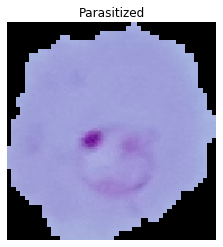

In [3]:
img = cv2.imread("cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png")
plt.imshow(img)
plt.axis("off")
plt.title("Parasitized")

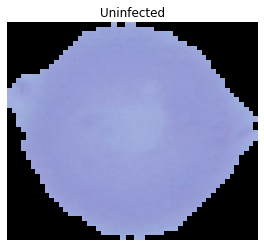

In [4]:
img = cv2.imread("cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
plt.imshow(img)
plt.axis("off")
plt.title("Uninfected")
plt.show()

In [5]:
x = img_to_array(img)

print(x.shape)

(139, 160, 3)


In [6]:
numberOfClass = len(glob(path + "/*"))

print(numberOfClass)

2


In [7]:
res_net = ResNet50(include_top = True, weights = "imagenet")

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
print(res_net.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [9]:
res_net.layers.pop()
res_net.layers.pop()

In [10]:
res_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [11]:
res_net_layer_list = res_net.layers

res_net_layer_list

In [12]:
model = Sequential()

In [13]:
from keras import Model, layers

In [17]:
model_input = layers.Input(shape=(224,224,3))

x = res_net(model_input)

x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(2, activation='softmax')(x)

model = Model(model_input, predictions)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [26]:
batch_size = 8

In [27]:
image_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.3)

In [28]:
train_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                    target_size = (224,224),
                                                    batch_size=batch_size,
                                                    class_mode = 'categorical',
                                                    subset='training')

test_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                    target_size = (224,224),
                                                    batch_size=batch_size,
                                                    class_mode = 'categorical',
                                                    subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [29]:
hist = model.fit_generator(train_data_gen,
                           steps_per_epoch=train_data_gen.n//batch_size,
                           epochs= 10,
                           validation_data=test_data_gen,
                           validation_steps= test_data_gen.n//batch_size)

Epoch 1/10
2411/2411 [==============================] - 1758s 729ms/step - loss: 0.4307 - acc: 0.8143 - val_loss: 0.3540 - val_acc: 0.8934
Epoch 2/10
2411/2411 [==============================] - 966s 400ms/step - loss: 0.2852 - acc: 0.9124 - val_loss: 0.2649 - val_acc: 0.9054
Epoch 3/10
2411/2411 [==============================] - 941s 390ms/step - loss: 0.2571 - acc: 0.9214 - val_loss: 0.2492 - val_acc: 0.9164
Epoch 4/10
2411/2411 [==============================] - 955s 396ms/step - loss: 0.2520 - acc: 0.9225 - val_loss: 0.2392 - val_acc: 0.9200
Epoch 5/10
2411/2411 [==============================] - 973s 403ms/step - loss: 0.2480 - acc: 0.9248 - val_loss: 0.2142 - val_acc: 0.9300
Epoch 6/10
2411/2411 [==============================] - 1073s 445ms/step - loss: 0.2463 - acc: 0.9277 - val_loss: 0.1912 - val_acc: 0.9359
Epoch 7/10
2411/2411 [==============================] - 970s 402ms/step - loss: 0.2338 - acc: 0.9311 - val_loss: 0.1999 - val_acc: 0.9403
Epoch 8/10
2411/2411 [==========

In [30]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


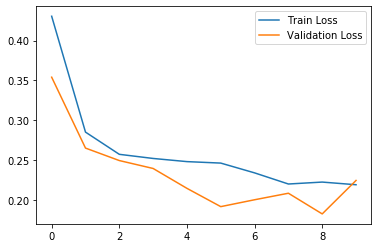

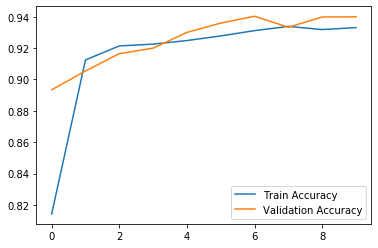

In [31]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["acc"], label = "Train Accuracy")
plt.plot(hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()